## **Generating Important Business Insights For Bimbo**

By  

Cosme Amaro Bautista  
Diego Alonso Bugarin Estrada  
José Eduardo López Romero  
Santiago Ortiz Pérez  

Rennes School of Business, December 2023

## Project Description

Aqui poner project description.

## Data Description

* X
* Y
* Z

## Libraries Used, Data File Reading and General Information from Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [3]:
plt.style.use('ggplot')

In [4]:
df_products = pd.read_csv('data/ags_data_processed.csv', index_col=0)
df_clients = pd.read_csv('data/clients_ags_processed.csv', index_col=0)
df = pd.merge(df_products,df_clients,on='Cliente_ID',how='inner')
df.head(5)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,NombreProductoCat,Category,Town,Grouped_Demanda,piece_amount,weight_grams,NombreCliente,client_type
0,3,1347,1,900,4711525,1064,8,133.36,0,0.0,8,Panque Marmol 255g BIM 1064,Panque Marmol,59,2251 AGUASCALIENTES NORTE,835,1,255,NO IDENTIFICADO,NI
1,3,1347,1,900,4711525,1146,30,641.70,0,0.0,30,Pan Integral 675g BIM 1146,Pan Integral,69,2251 AGUASCALIENTES NORTE,7449,1,675,NO IDENTIFICADO,NI
2,3,1347,1,900,4711525,1150,18,251.28,0,0.0,18,Medias Noches 8p 340g BIM 1150,Medias Noches,18,2251 AGUASCALIENTES NORTE,7944,8,340,NO IDENTIFICADO,NI
3,3,1347,1,900,4711525,1160,9,169.74,0,0.0,9,Bimbollos 8p 450g BIM 1160,Bimbollos,71,2251 AGUASCALIENTES NORTE,3058,8,450,NO IDENTIFICADO,NI
4,3,1347,1,900,4711525,1169,21,396.06,0,0.0,21,Bimbollos Extra 6p 480g BIM 1169,Bimbollos Extra,75,2251 AGUASCALIENTES NORTE,2640,6,480,NO IDENTIFICADO,NI


In [5]:
df.drop(labels=['Ruta_SAK','Cliente_ID','Producto_ID','Grouped_Demanda','Town','Venta_hoy','Dev_proxima'], axis=1,inplace=True)
df.columns = map(str.lower, df.columns)
df.rename(columns={'semana':'week','agencia_id':'agency_number','canal_id':'channel_id','venta_uni_hoy':'unit_sales',\
                    'dev_uni_proxima':'unit_return','nombreproducto':'full_product_name','nombreproductocat':'product_category',\
                    'category':'numerical_category','nombrecliente':'client_name'}, inplace=True)

Unnecessary columns dropped, they are either part of a join from previous databases, repeated information, or columns added by the team for other purposes. Also translated and renamed columns to make further tables more readable.

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264976 entries, 0 to 1264975
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   week                1264976 non-null  int64 
 1   agency_number       1264976 non-null  int64 
 2   channel_id          1264976 non-null  int64 
 3   unit_sales          1264976 non-null  int64 
 4   unit_return         1264976 non-null  int64 
 5   demanda_uni_equil   1264976 non-null  int64 
 6   full_product_name   1264976 non-null  object
 7   product_category    1264976 non-null  object
 8   numerical_category  1264976 non-null  int64 
 9   piece_amount        1264976 non-null  int64 
 10  weight_grams        1264976 non-null  int64 
 11  client_name         1264976 non-null  object
 12  client_type         1264976 non-null  object
dtypes: int64(9), object(4)
memory usage: 454.2 MB


Aquí va la interpretación de los datos de arriba.
Ex. Data does not need cleaning, amount Categorical Cols,amount Numerical Cols

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
week,1264976.0,5.918738,2.010769,3.0,4.0,6.0,8.0,9.0
agency_number,1264976.0,1351.023545,23.366863,1347.0,1347.0,1351.0,1351.0,1974.0
channel_id,1264976.0,1.340101,1.486761,1.0,1.0,1.0,1.0,11.0
unit_sales,1264976.0,7.443712,20.125248,0.0,2.0,3.0,7.0,3219.0
unit_return,1264976.0,0.109474,2.768760,0.0,0.0,0.0,0.0,1410.0
demanda_uni_equil,1264976.0,7.369994,19.741478,0.0,2.0,3.0,7.0,3191.0
numerical_category,1264976.0,158.029407,160.021492,3.0,71.0,90.0,193.0,1028.0
piece_amount,1264976.0,4.277906,6.756856,0.0,1.0,2.0,6.0,200.0
weight_grams,1264976.0,182.340926,221.311309,5.0,75.0,106.0,255.0,31000.0


Interpretacion de datos estadisticos.
Ex.  
Donde se situa la mayoria de ventas a partir de info de semana.  
Ventas...  
Devoluciones...  
Etc...

In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
full_product_name,1264976,475,Nito 1p 62g Central BIM 2425,58363
product_category,1264976,288,Nito,60659
client_name,1264976,7378,NO IDENTIFICADO,226506
client_type,1264976,13,Individual,769064


Interpretacion de datos...  
Que significan los valores unicos...  
Valores más comunes en el df por categoria significan...  

In [9]:
df.nunique()

week                     7
agency_number            5
channel_id               6
unit_sales             628
unit_return            118
demanda_uni_equil      625
full_product_name      475
product_category       288
numerical_category     288
piece_amount            28
weight_grams           170
client_name           7378
client_type             13
dtype: int64

Unique Values in each column.

## Data Analization

### Sales and Returns per week in the state, table and visualization in graph.

In [11]:
scw_pivot = pd.pivot_table(df,index=['client_type'],columns=['week'],values=['unit_sales'],aggfunc=np.sum)
scw_pivot = scw_pivot.reindex(scw_pivot['unit_sales'].sort_values(by=3,ascending=False).index)
scw_pivot.drop(labels=['NI'],axis=0,inplace=True)
scw_pivot = scw_pivot.T.reset_index()
scw_pivot.set_index('week',inplace=True)
scw_pivot = scw_pivot.iloc[:,1:]
other_clients_pivot = scw_pivot.iloc[:,-6:].sum(axis=1)
scw_pivot = scw_pivot.iloc[:,:-6]
scw_pivot['Other'] = other_clients_pivot
scw_pivot

client_type,Individual,Small Store,Big Store,OXXO Store,Medium Store,Consignment,Other
week,,,,,,,
3,735251,155775,65391,62769,49548,34239,42182
4,744723,160521,76500,65343,49125,48098,40867
5,752099,157775,73013,64693,47663,34859,35431
6,705246,145859,82490,56762,45961,28468,36342
7,718522,156511,81439,54644,47530,37034,39752
8,698521,147774,78256,55864,45867,34407,39095
9,662890,139079,77397,60214,44249,33508,39116


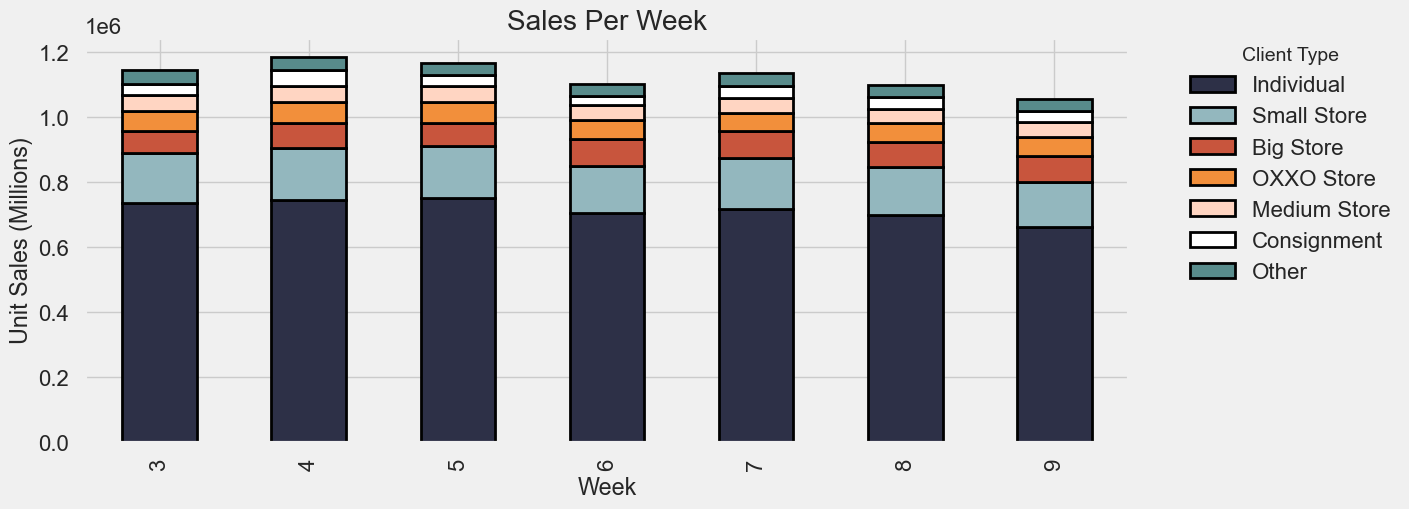

In [64]:

scw_pivot.plot(kind='bar',stacked=True,title='Sales Per Week',ec='black',lw=2,\
               color=['#2d3047','#93b7be','#c8553d','#f28f3b','#ffd5c2','#ffffff','#588b8b'],\
               xlabel='Week', ylabel='Unit Sales (Millions)',figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Client Type')
plt.show()

In [65]:
#Returns

scw_pivot = pd.pivot_table(df,index=['client_type'],columns=['week'],values=['unit_return'],aggfunc=np.sum)
scw_pivot = scw_pivot.reindex(scw_pivot['unit_return'].sort_values(by=3,ascending=False).index)
scw_pivot.drop(labels=['NI'],axis=0,inplace=True)
scw_pivot = scw_pivot.T.reset_index()
scw_pivot.set_index('week',inplace=True)
scw_pivot = scw_pivot.iloc[:,1:]
other_clients_pivot = scw_pivot.iloc[:,-6:].sum(axis=1)
scw_pivot = scw_pivot.iloc[:,:-6]
scw_pivot['Other'] = other_clients_pivot
scw_pivot

client_type,Individual,Consignment,Small Store,Big Store,Medium Store,Restaurant,Other
week,,,,,,,
3,9293,1915,1836,618,592,118,156
4,11079,4834,1964,1471,505,142,41
5,11002,1540,1820,877,675,37,52
6,11081,1966,2105,641,361,176,52
7,11521,2005,2198,1308,625,1337,69
8,12735,1291,2546,919,606,101,125
9,10987,1912,1960,1178,748,175,76


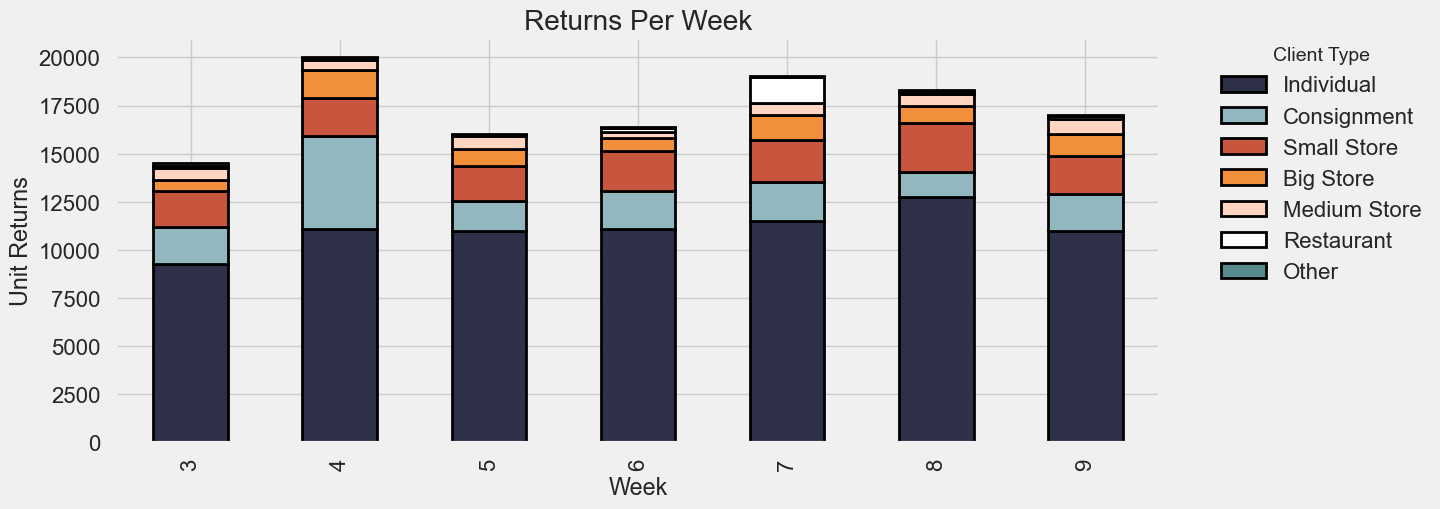

In [67]:
scw_pivot.plot(kind='bar',stacked=True,title='Returns Per Week',ec='black',lw=2,\
               color=['#2d3047','#93b7be','#c8553d','#f28f3b','#ffd5c2','#ffffff','#588b8b'],\
               xlabel='Week', ylabel='Unit Returns',figsize=(12,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title='Client Type')
plt.show()

Hypothesis:
The proportion of returns made by Big Stores is the same as the returns made by Big Stores.

### Most popular products in stores around the state.

In [76]:
product_df = df[['client_type','product_category','unit_sales','unit_return']]
product_df = product_df[product_df['client_type'].isin(['Big Store','Small Store','Medium Store'])]

product_df.groupby('product_category').sum().sort_values(by='unit_sales',ascending=False)

C:\Users\perez\AppData\Local\Temp\ipykernel_16436\2750753033.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_df.groupby('product_category').sum().sort_values(by='unit_sales',ascending=False)


,unit_sales,unit_return
product_category,,
Nito,262942,1660
Pan Blanco,107785,1139
Rebanada,97445,356
Pan Integral,93343,784
Gansito,89819,747
...,...,...
Galleta Cereleta,0,3
Principe mas Navigalleta 42,0,4
Chocochips 100 cal 8P,0,3
